In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import scipy.stats as stats

from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.stats.diagnostic import normal_ad

In [2]:
df = pd.read_csv("Задания/Datasets/iris.txt")
df.columns = ['SPLength', 'SPWidth', 'PTLength', 'PTWidth', 'Species']
print(df.shape)
df.head(20)

(149, 5)


,SPLength,SPWidth,PTLength,PTWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [3]:
df['Species'] = df['Species'].str.replace('Iris-', '', regex=False)
df.head(2)

,SPLength,SPWidth,PTLength,PTWidth,Species
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SPLength  149 non-null    float64
 1   SPWidth   149 non-null    float64
 2   PTLength  149 non-null    float64
 3   PTWidth   149 non-null    float64
 4   Species   149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
data = df.copy()
df.isnull().sum()

SPLength    0
SPWidth     0
PTLength    0
PTWidth     0
Species     0
dtype: int64

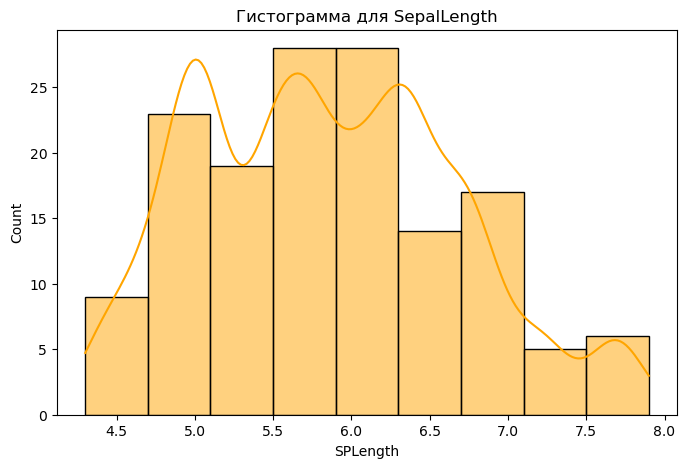

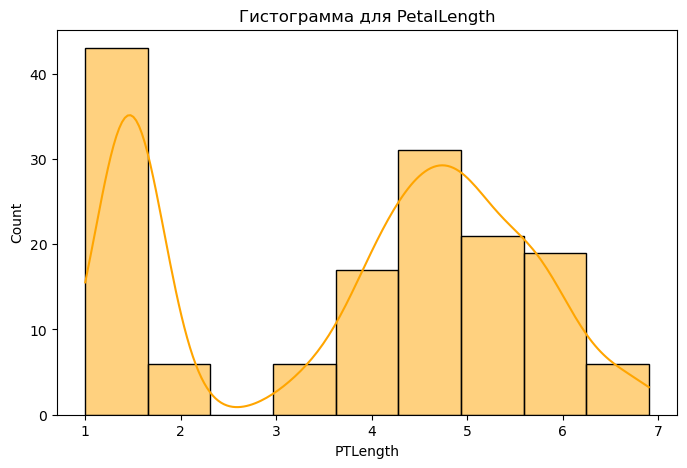

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(data['SPLength'], kde=True, color='orange',kde_kws={'bw_adjust': 0.5})  
# kde=True добавляет линию плотности
# dw_adjust настраивает уровень сглаживания kde
plt.title(f'Гистограмма для SepalLength')
plt.show()
plt.figure(figsize=(8, 5))
sns.histplot(data['PTLength'], kde=True, color='orange',kde_kws={'bw_adjust': 0.5})  
# kde=True добавляет линию плотности
# dw_adjust настраивает уровень сглаживания kde
plt.title(f'Гистограмма для PetalLength')
plt.show()

In [7]:
# Shapiro-Wilk
stat, p = stats.shapiro(df['SPLength'])
print('Shapiro-Wilk for spetal length:')
print('Статистика:', stat, 'p-значение:', p)
if p<0.05:
    print( "Нет нормального расспределения")
if p>0.05:
    print( "Есть нормальное расспределение")
    
# Shapiro-Wilk
stat, p = stats.shapiro(df['PTLength'])
print('Shapiro-Wilk for petal length:')
print('Статистика:', stat, 'p-значение:', p)
if p<0.05:
    print( "Нет нормального расспределения")
if p>0.05:
    print( "Есть нормальное расспределение")    

Shapiro-Wilk for spetal length:
Статистика: 0.9768275695872636 p-значение: 0.012714618787229303
Нет нормального расспределения
Shapiro-Wilk for petal length:
Статистика: 0.8774444757621048 p-значение: 9.304441124938155e-10
Нет нормального расспределения


    Гипотеза о нормальном  распределении не выполняется для общей кучи

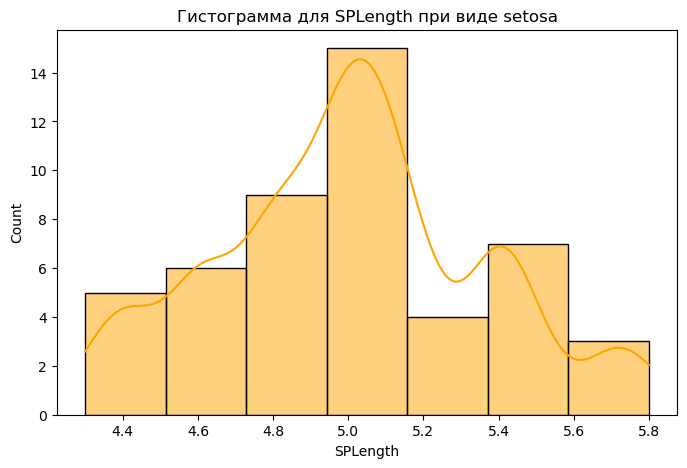

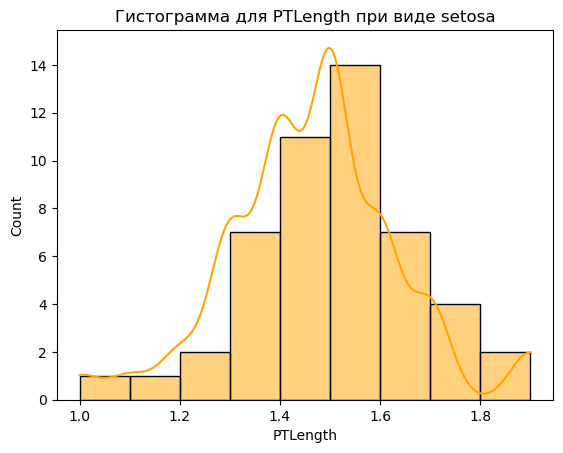

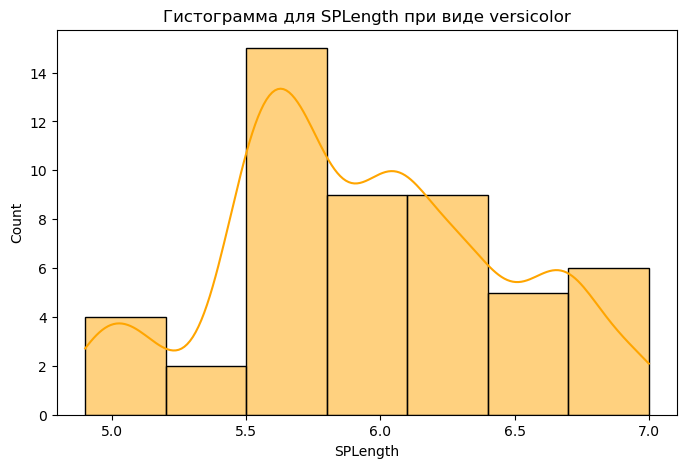

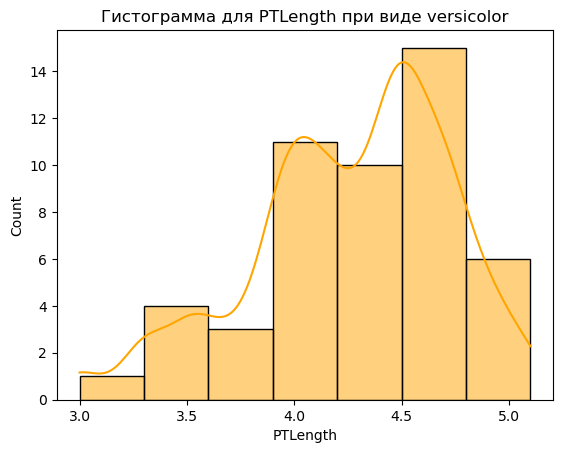

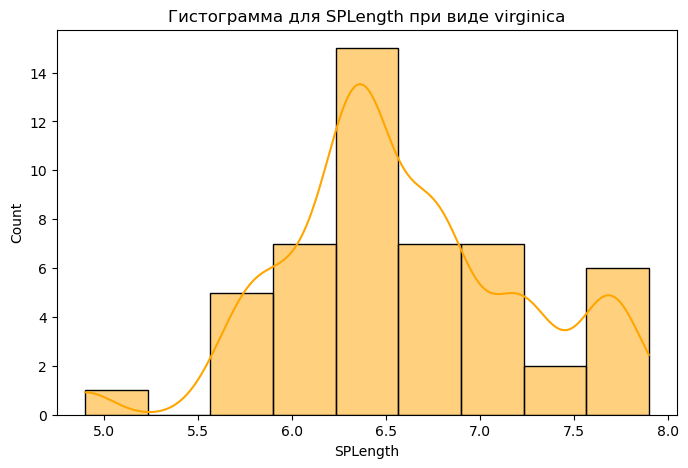

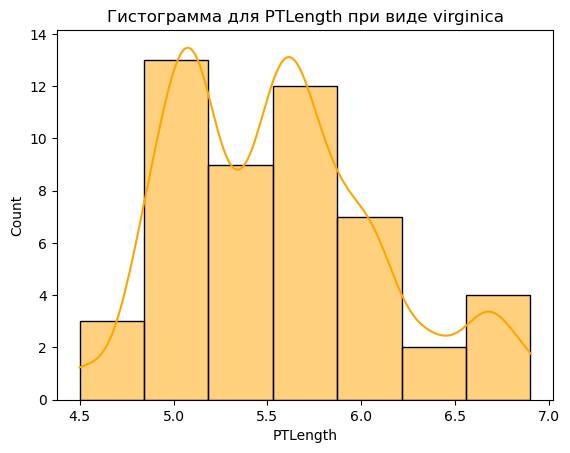

In [8]:
for i in ['setosa', 'versicolor', 'virginica']:
    subdata = df[df['Species'] == i]
    plt.figure(figsize=(8, 5))
    sns.histplot(subdata['SPLength'], kde=True, color='orange',kde_kws={'bw_adjust': 0.5})  
    # kde=True добавляет линию плотности
    # dw_adjust настраивает уровень сглаживания kde
    plt.title(f'Гистограмма для SPLength при виде {i}')
    plt.show()
    sns.histplot(subdata['PTLength'], kde=True, color='orange',kde_kws={'bw_adjust': 0.5})  
    # kde=True добавляет линию плотности
    # dw_adjust настраивает уровень сглаживания kde
    plt.title(f'Гистограмма для PTLength при виде {i}')
    plt.show()

In [9]:
for i in ['setosa', 'versicolor', 'virginica']:
    subdata = df[df['Species'] == i]
    # Shapiro-Wilk
    stat, p = stats.shapiro(subdata['SPLength'])
    print(f'Shapiro-Wilk for spetal length {i}:')
    print('Статистика:', stat, 'p-значение:', p)
    if p<0.05:
        print( "Нет нормального расспределения")
    if p>0.05:
        print( "Есть нормальное расспределение")
        
    # Shapiro-Wilk
    stat, p = stats.shapiro(subdata['PTLength'])
    print(f'Shapiro-Wilk for petal length {i}:')
    print('Статистика:', stat, 'p-значение:', p)
    if p<0.05:
        print( "Нет нормального расспределения")
    if p>0.05:
        print( "Есть нормальное расспределение")   

Shapiro-Wilk for spetal length setosa:
Статистика: 0.9780593886700594 p-значение: 0.4868613246956402
Есть нормальное расспределение
Shapiro-Wilk for petal length setosa:
Статистика: 0.9563882261708665 p-значение: 0.06728967511168371
Есть нормальное расспределение
Shapiro-Wilk for spetal length versicolor:
Статистика: 0.9778356785897521 p-значение: 0.4647370359250263
Есть нормальное расспределение
Shapiro-Wilk for petal length versicolor:
Статистика: 0.96600440254332 p-значение: 0.15847783815657573
Есть нормальное расспределение
Shapiro-Wilk for spetal length virginica:
Статистика: 0.971179397111026 p-значение: 0.25831474614079086
Есть нормальное расспределение
Shapiro-Wilk for petal length virginica:
Статистика: 0.9621864428612802 p-значение: 0.10977536903223506
Есть нормальное расспределение


In [10]:
# Извлекаем данные по весу
data = df[['SPLength', 'SPWidth', 'PTLength', 'PTWidth']]

# Расчет среднего и стандартного отклонения для каждого столбца
mean = data.mean()
std_dev = data.std(ddof=1)  # Используем ddof=1 для выборочного стандартного отклонения
n = len(data)

# Уровень доверия
confidence_level = 0.95
alpha = 1 - confidence_level

# Определяем критическое значение (z-значение для нормального распределения)
z_critical = stats.norm.ppf(1 - alpha / 2)

# Вычисляем стандартную ошибку
standard_error = std_dev / np.sqrt(n)

# Рассчитываем доверительные интервалы
margin_of_error = z_critical * standard_error

# Доверительные интервалы для среднего
confidence_intervals = (mean - margin_of_error, mean + margin_of_error)

# Определяем критические значения хи-квадрат
chi2_lower = stats.chi2.ppf(alpha / 2, df=n - 1)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, df=n - 1)

# Вычисляем доверительные интервалы для стандартного отклонения
lower_bound = np.sqrt((n - 1) * std_dev**2 / chi2_upper)
upper_bound = np.sqrt((n - 1) * std_dev**2 / chi2_lower)

# Вывод результатов
for column in data.columns:
    print(f"Доверительный интервал для стандартного отклонения {column}: ({lower_bound[column]:.2f}, {upper_bound[column]:.2f})")
    print(f"Доверительный интервал для среднего {column}: {confidence_intervals[0][column]:.2f} - {confidence_intervals[1][column]:.2f}\n")


Доверительный интервал для стандартного отклонения SPLength: (0.74, 0.94)
Доверительный интервал для среднего SPLength: 5.72 - 5.98

Доверительный интервал для стандартного отклонения SPWidth: (0.39, 0.49)
Доверительный интервал для среднего SPWidth: 2.98 - 3.12

Доверительный интервал для стандартного отклонения PTLength: (1.58, 1.99)
Доверительный интервал для среднего PTLength: 3.49 - 4.06

Доверительный интервал для стандартного отклонения PTWidth: (0.68, 0.86)
Доверительный интервал для среднего PTWidth: 1.08 - 1.33

